---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
seoul_bike = pd.read_csv('sbikedata.csv')
seoul_bike

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [119]:
seoul_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : 
    ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 :
    ㅇ 귀무가설 : 

- 가설 3 :

- 가설 4 :

- 가설 5 :

- 가설 6 :

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [120]:
def func_info(df, var):
    print('====데이터 타입 확인====')
    display(df[var].dtypes)
    print()
    print('====데이터 확인====')
    display(df[var])
    print()
    print('====결측치 확인====')
    display(df[var].isna().value_counts())
    if (df[var].dtypes == 'object'):
        

In [121]:
def func_numeric(var):
    func(var)
    
    print()
    print('평균 : ', seoul_bike[var].mean())
    print()
    print('====기초통계량====')
    display(seoul_bike[var].describe())
    print()
    
    print('====히스토그램 & 커널 밀도 함수====')
    sns.histplot(x=var, data=seoul_bike, kde=True)
    plt.grid()
    plt.show()
    
    print('====박스플롯====')
    plt.boxplot(seoul_bike[var], vert=False)
    plt.grid()
    plt.show()

In [122]:
def func_categoric(var):
    func(var)
    
    print()
    print('====범주별 개수 확인====')
    print(seoul_bike[var].value_counts())
    print()
    print('====범주별 비율 확인====')
    print(seoul_bike[var].value_counts(normalize=True))
    
    print()
    print('====바 차트====')
    sns.countplot(x = var, data = seoul_bike)
    plt.grid()
    plt.show()

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [99]:
#변수의 자료형을 확인해보세요.
seoul_bike['hour'].dtypes

dtype('int64')

====데이터 타입 확인====


dtype('int64')


====데이터 확인====


0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64


====결측치 확인====


False    5827
Name: hour, dtype: int64


====범주별 개수 확인====
1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

====범주별 비율 확인====
1     0.041702
14    0.041702
23    0.041702
22    0.041702
21    0.041702
20    0.041702
19    0.041702
18    0.041702
17    0.041702
16    0.041702
15    0.041702
13    0.041702
12    0.041702
11    0.041702
10    0.041702
9     0.041702
8     0.041702
7     0.041702
5     0.041702
0     0.041702
2     0.041531
6     0.041531
3     0.041531
4     0.041359
Name: hour, dtype: float64

====바 차트====


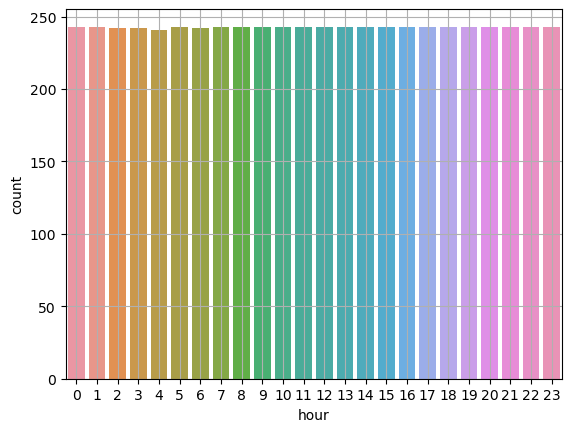

In [106]:
func_categoric('hour')

3. 변수의 결측치 존재 여부 및 조치방안

4. 변수의 기초 통계량 확인

5. 변수의 분포 확인

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 이게 뭐람....

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 기온이 너무 높거나 너무 낮으면 야외 활동에 제한이 생긴다. 
- 때문에 데이터에서 가장 많이 분포하는 기온이 야외 생활에 적절한 기온이 아닐지?

2. 변수가 수치형인지 범주형인지
- 수치형

In [108]:
#변수의 자료형을 확인해보세요.
var = 'temperature'
seoul_bike[var].dtypes

dtype('float64')

====데이터 타입 확인====


dtype('float64')


====데이터 확인====


0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64


====결측치 확인====


False    5827
Name: temperature, dtype: int64


평균 :  19.37679766603743

====기초통계량====


count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64


====히스토그램 & 커널 밀도 함수====


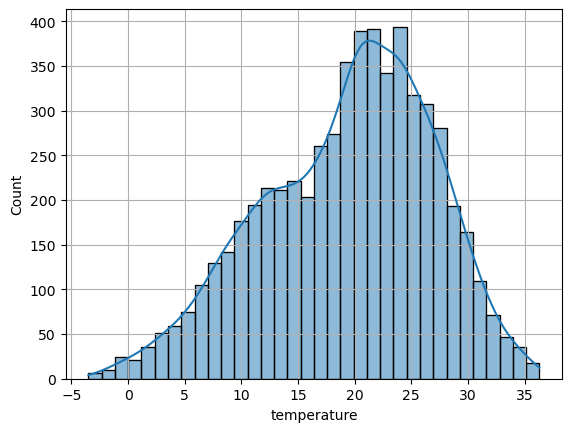

====박스플롯====


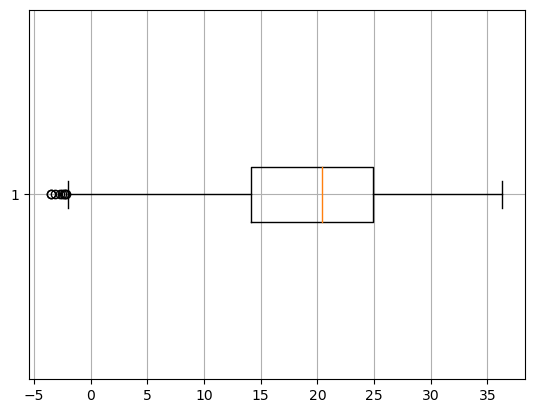

In [109]:
func_numeric(var)

3. 변수의 결측치 존재 여부 및 조치방안

In [2]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 14도에서 24도 사이의 데이터가 50% 이다.
- 14도 아래, 25도 위에서 자전거를 타는 것이 제한되지는 않으니 탈 수느 ㄴ있다. 
- 하지만 너무 당연한 사실, 더 괜찮은 척도가 없을까

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

In [154]:
seoul_bike['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

====데이터 타입 확인====


dtype('int64')


====데이터 확인====


0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64


====결측치 확인====


False    5827
Name: precipitation, dtype: int64


====범주별 개수 확인====
0    5387
1     440
Name: precipitation, dtype: int64

====범주별 비율 확인====
0    0.924489
1    0.075511
Name: precipitation, dtype: float64

====바 차트====


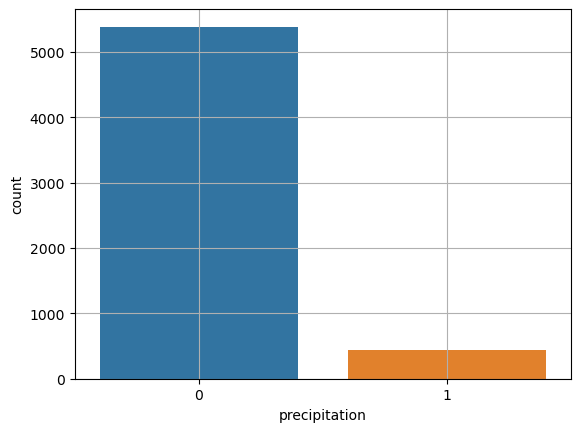

In [155]:
func_categoric('precipitation')

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [1]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

====데이터 타입 확인====


dtype('float64')


====데이터 확인====


0       1.4
1       2.1
2       3.4
3       3.1
4       2.9
       ... 
5822    0.3
5823    2.0
5824    1.9
5825    2.1
5826    2.3
Name: windspeed, Length: 5827, dtype: float64


====결측치 확인====


False    5827
Name: windspeed, dtype: int64


평균 :  2.2376008237514937

====기초통계량====


count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64


====히스토그램 & 커널 밀도 함수====


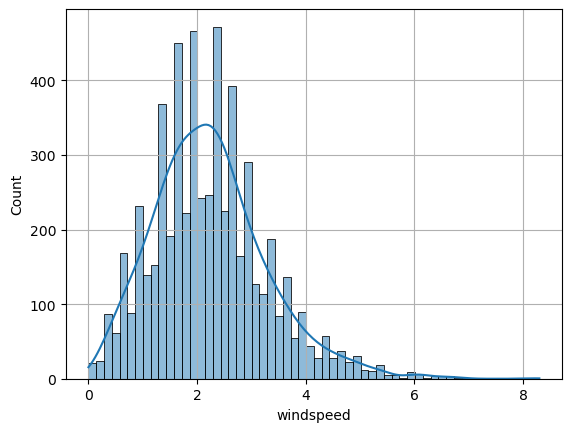

====박스플롯====


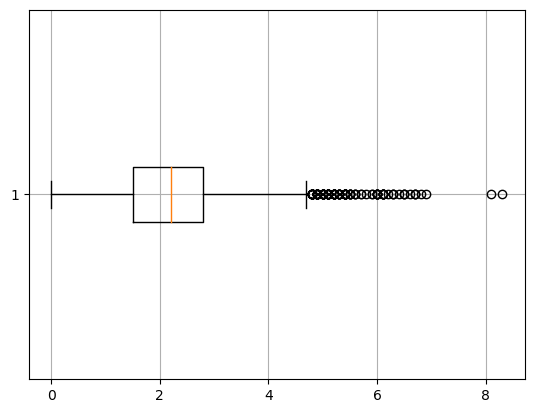

In [156]:
func_numeric('windspeed')

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

====데이터 타입 확인====


dtype('int64')


====데이터 확인====


0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5827, dtype: int64


====결측치 확인====


False    5827
Name: humidity, dtype: int64


평균 :  68.60871803672559

====기초통계량====


count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64


====히스토그램 & 커널 밀도 함수====


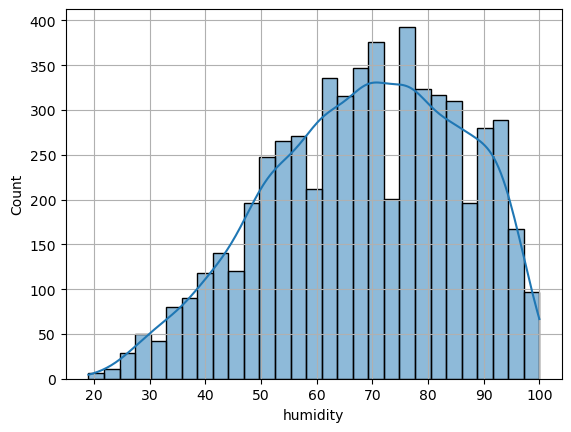

====박스플롯====


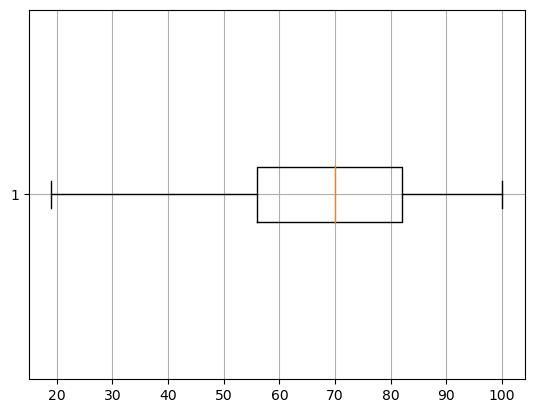

In [157]:
func_numeric('humidity')

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

====데이터 타입 확인====


dtype('int64')


====데이터 확인====


0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64


====결측치 확인====


False    5827
Name: visibility, dtype: int64


평균 :  1758.438647674618

====기초통계량====


count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64


====히스토그램 & 커널 밀도 함수====


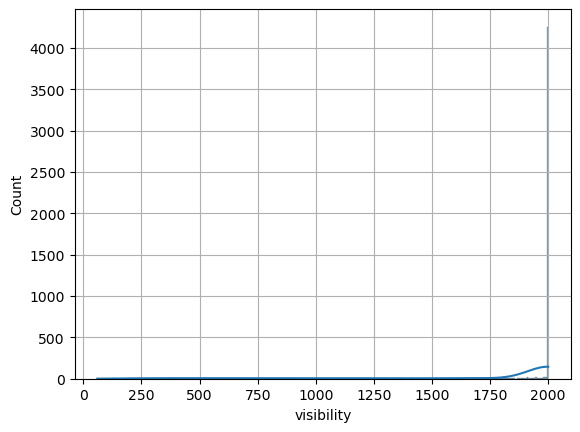

====박스플롯====


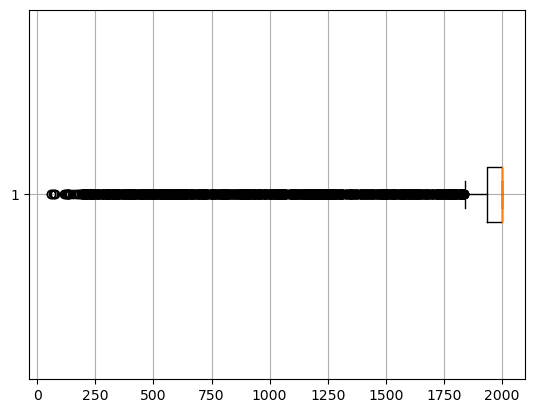

In [158]:
func_numeric('visibility')

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

====데이터 타입 확인====


dtype('float64')


====데이터 확인====


0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64


====결측치 확인====


False    5699
True      128
Name: ozone, dtype: int64


평균 :  0.03181137041586235

====기초통계량====


count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64


====히스토그램 & 커널 밀도 함수====


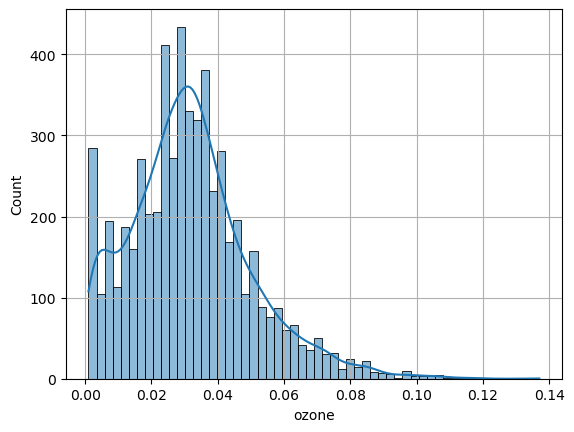

====박스플롯====


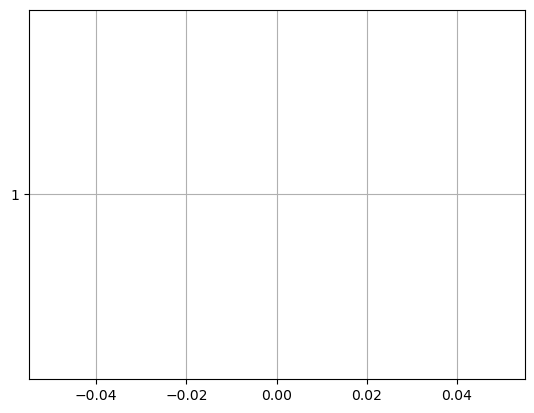

In [159]:
func_numeric('ozone')

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

====데이터 타입 확인====


dtype('float64')


====데이터 확인====


0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5822    74.0
5823    65.0
5824    51.0
5825    43.0
5826    39.0
Name: PM10, Length: 5827, dtype: float64


====결측치 확인====


False    5725
True      102
Name: PM10, dtype: int64


평균 :  31.970655021834062

====기초통계량====


count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64


====히스토그램 & 커널 밀도 함수====


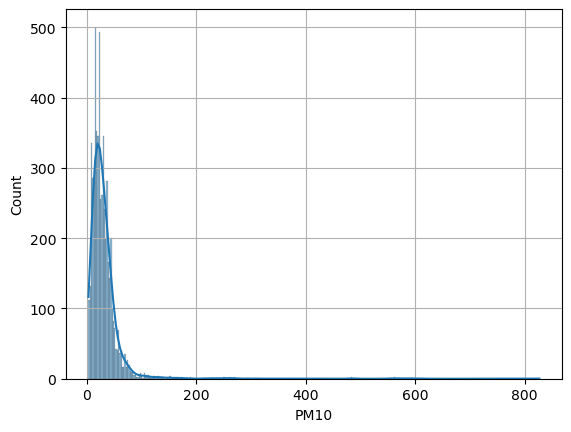

====박스플롯====


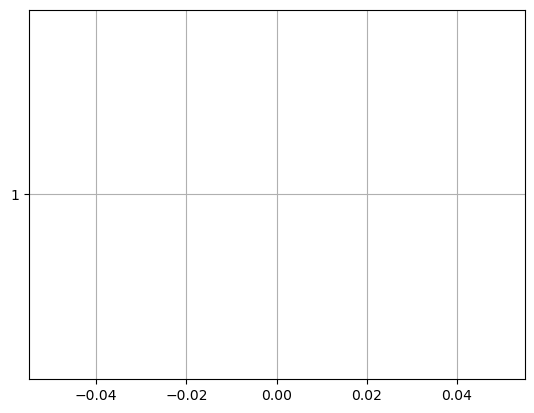

In [160]:
func_numeric('PM10')

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

====데이터 타입 확인====


dtype('float64')


====데이터 확인====


0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5827, dtype: float64


====결측치 확인====


False    5732
True       95
Name: PM2.5, dtype: int64


평균 :  15.666608513607816

====기초통계량====


count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64


====히스토그램 & 커널 밀도 함수====


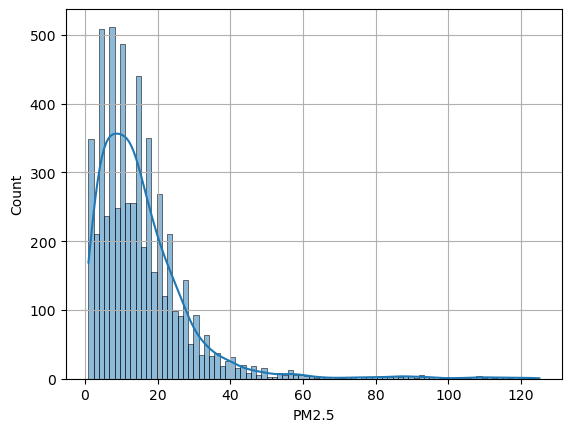

====박스플롯====


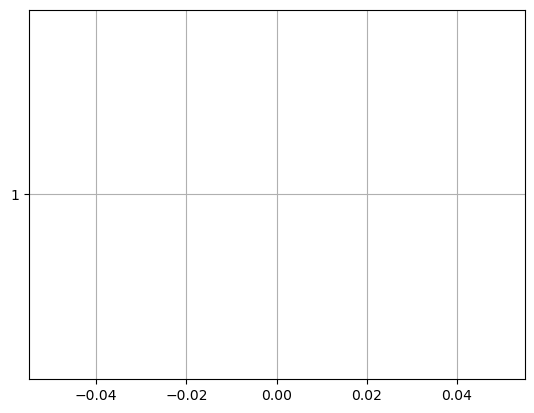

In [161]:
func_numeric('PM2.5')

In [61]:
df = seoul_bike.loc[seoul_bike['PM2.5'].isna()]
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5504,2021-11-16,14,NaN,NaN,NaN,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,NaN,13.3,0,3.3,37,2000,233
5506,2021-11-16,16,NaN,NaN,NaN,13.0,0,3.0,41,2000,302
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157


2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [56]:
#변수의 자료형을 확인해보세요.
seoul_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 675.3+ KB


====데이터 타입 확인====


dtype('int64')


====데이터 확인====


0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5827, dtype: int64


====결측치 확인====


False    5827
Name: count, dtype: int64


평균 :  215.11789943367083

====기초통계량====


count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64


====히스토그램 & 커널 밀도 함수====


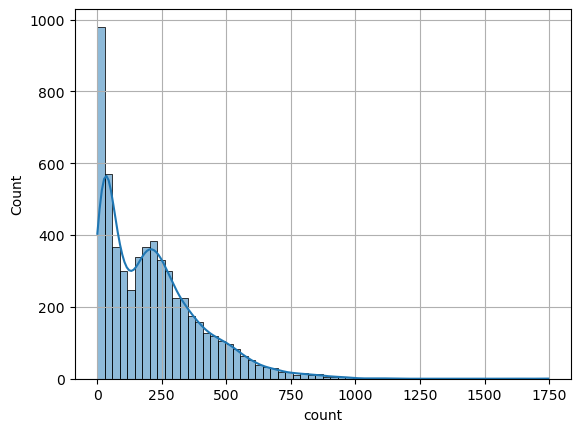

====박스플롯====


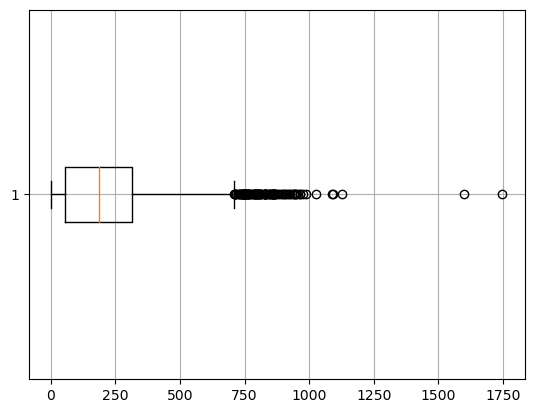

In [57]:
func1('count')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 평균은 215회 대여
- 53회부터 315회 대여 사이에 50%의 데이터가 존재
- 박스플롯에 따르면 우측으로 이상치라 생각할 수 있는 데이터가 다수 존재

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

In [65]:
def func_heatmap(data):
    plt.figure(figsize = (8, 8))
    sns.heatmap(data.corr(), 
                annot = True,            # 숫자(상관계수) 표기 여부
                fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
                cmap = 'RdYlBu_r',       # 칼라맵
                vmin = -1, vmax = 1)     # 값의 최소, 최대값값

In [84]:
def func_corr(var, target):
    print('====피어슨 상관계수 & p-value====')
    print(spst.pearsonr(seoul_bike[var], seoul_bike[target]))
    
    print()
    print('====히스토그램 & 회귀선====')
    sns.regplot(x=var, y=target, data = seoul_bike)
    plt.grid()
    plt.show()

In [77]:
def func_t_test(var, target, data1, data2):
    temp = seoul_bike.loc[seoul_bike[target].notnull()]

    # 두 그룹으로 데이터 저장
    group1 = temp.loc[temp[var] == data1, target]
    group2 = temp.loc[temp[var] == data2, target]

    print('====t-test 결과====')
    print(spst.ttest_ind(group1, group2))

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [72]:
target = 'count'

In [73]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [74]:
seoul_bike['precipitation'].unique()

array([0, 1], dtype=int64)

In [79]:
func_t_test('precipitation', target, 0, 1)

====t-test 결과====
Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)


#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

In [ ]:
func_heatmap(seoul_bike)

2. 시간대별 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.5864350283919393, 0.0)

====히스토그램 & 회귀선====


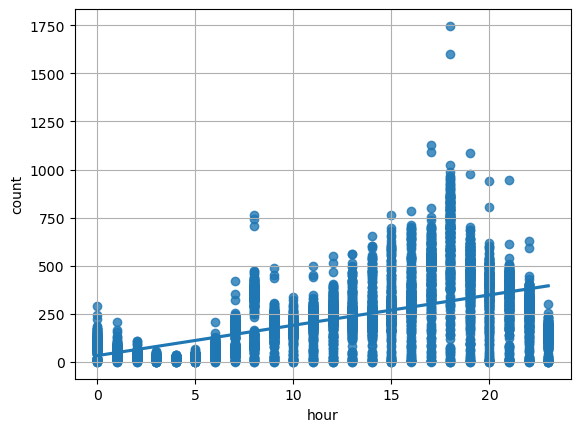

In [87]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
func_corr('hour', target)

3. 온도 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.2771692363089791, 2.9405165551619465e-103)

====히스토그램 & 회귀선====


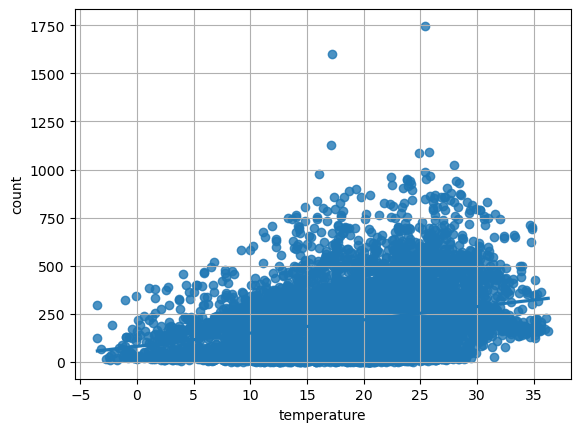

In [86]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
func_corr('temperature', target)

4. 풍속 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.22372189900674888, 5.2433176782994606e-67)

====히스토그램 & 회귀선====


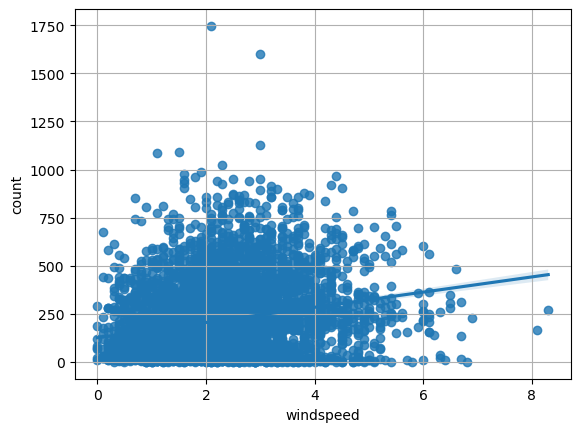

In [91]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
func_corr('windspeed', target)

5. 습도 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(-0.4789554265904137, 0.0)

====히스토그램 & 회귀선====


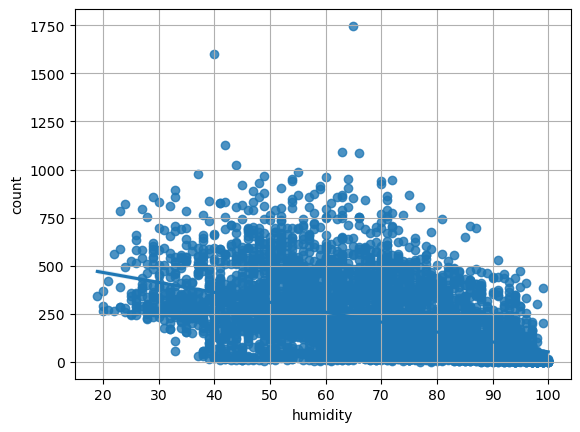

In [92]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
func_corr('humidity', target)

6. 시정 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.26582778327488765, 7.876003852900128e-95)

====히스토그램 & 회귀선====


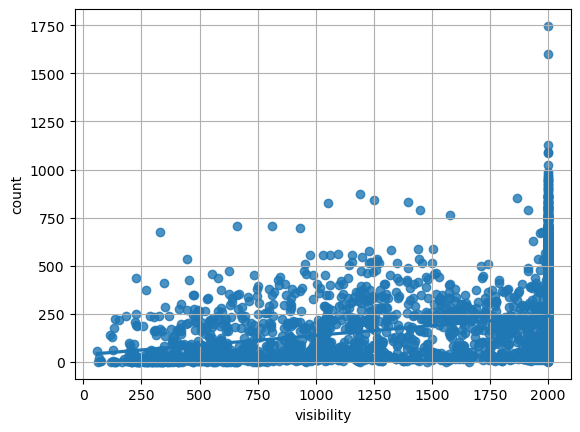

In [93]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
func_corr('visibility', target)

7. 오존 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.3160825461602971, 2.0399108418555165e-132)

====히스토그램 & 회귀선====


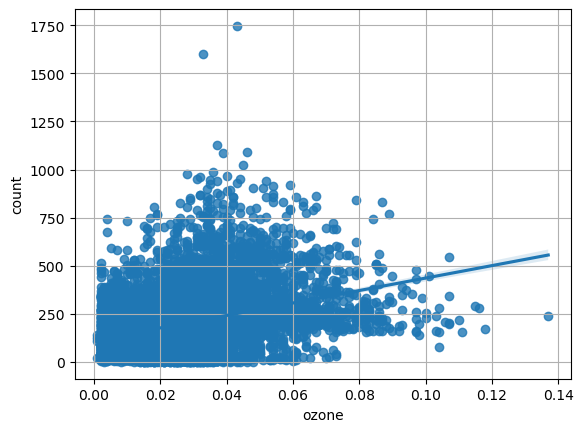

In [94]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
var = 'ozone'
df = seoul_bike.copy()
df = df.loc[df[var].notnull()]

print('====피어슨 상관계수 & p-value====')
print(spst.pearsonr(df[var], df[target]))

print()
print('====히스토그램 & 회귀선====')
sns.regplot(x=var, y=target, data = seoul_bike)
plt.grid()
plt.show()

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.028282375475144235, 0.032361979319587446)

====히스토그램 & 회귀선====


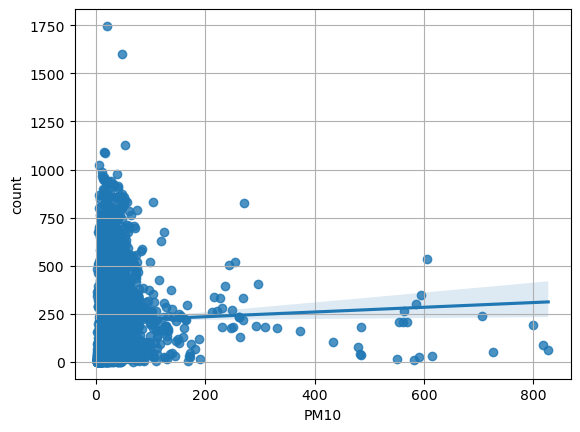

In [95]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
var = 'PM10'
df = seoul_bike.copy()
df = df.loc[df[var].notnull()]

print('====피어슨 상관계수 & p-value====')
print(spst.pearsonr(df[var], df[target]))

print()
print('====히스토그램 & 회귀선====')
sns.regplot(x=var, y=target, data = seoul_bike)
plt.grid()
plt.show()

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

====피어슨 상관계수 & p-value====
(0.03712975748890091, 0.00493188735040528)

====히스토그램 & 회귀선====


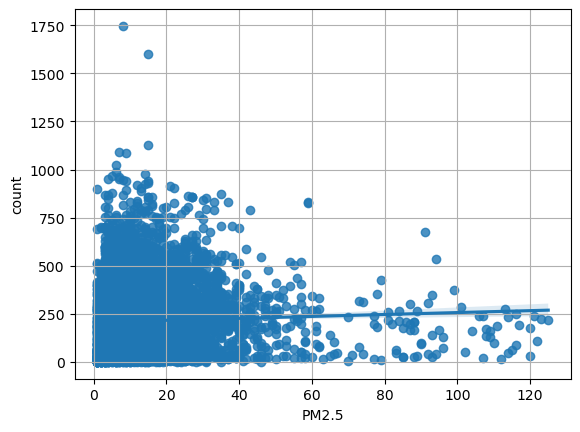

In [96]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
var = 'PM2.5'
df = seoul_bike.copy()
df = df.loc[df[var].notnull()]

print('====피어슨 상관계수 & p-value====')
print(spst.pearsonr(df[var], df[target]))

print()
print('====히스토그램 & 회귀선====')
sns.regplot(x=var, y=target, data = seoul_bike)
plt.grid()
plt.show()

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출